<a href="https://colab.research.google.com/github/TurkuNLP/ATP_kurssi/blob/master/Notebook6_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Processing language data

Analyzing running text has some aspects that need special attention. Tokenization and inflection affect the sparsity of the data. Taking into account these can simplify the analysis and improve the results.

Part-of-speech and syntactic information can provide metadata on the kinds of words included in the dataset and their roles.

### Tokenization
* Multi word units: _New York, University of Turku_
* _Oh really!! Oh really. Oh really:)_ --> Oh really 

### Inflection 
* EN: _is, are, was, were_ --> to be
* FI: _yö, yöksi, öisin_ --> a night 


### Part-of-speech classes (POS)
* Denotes the meaning and function of the word
* Adjectives describe, verbs denote action, nouns refer to things, etc.
* Distinction between _function words_ and _content words_
  * Function words typically grammatical words, such as conjunctions, auxiliaries, pronouns
  * Content words typically verbs and nouns reflecting the topical content of the text
  * BUT is this so simple?

### Syntax
* Roles the words play in a sentence
  * _subjects_ perform the action - who does?
  * _objects_ describe the target - to whom or what is the action targeted?
  * _modifiers_ modify or provide more information about, e.g., a noun. What kind of a thing?
* Relations between words
  * The actor of the verb - subject
  * The object of the action - object

## Dependency parsing as a tool for preprocessing and normalizing language data

Syntax analyzed and lemmatized data provides solutions to many challenges related to processing language data.

A pipeline consisting of a number of steps.

### POS
  * 17 values
  * https://universaldependencies.org/u/pos/index.html

### Morphology 
  * E.g., Case=Nom or Number=Sing 
  * Cases, infinitives, passive/active, etc.
  * Finnish has 80+ unique features
  * https://universaldependencies.org/u/feat/index.html

### Lemmatisation
  * Canonical or base form of the word, the one typically found in dictionaries

### Dependency syntax

* Typed dependency relations between words
* Basic dependency representation forms a tree
  * Exactly one word is the head of the sentence
  * All other words are dependent on another word in the sentence
* Dependency relations primarily between content words
* Function words attach as direct dependents of the most closely related content word
* 37 universal relations + language-specific subtypes
* https://universaldependencies.org/u/dep/index.html


ud-en-example.png

## From treebanks to parsers

Datasets consisting of manually syntax-annotated sentences are called _treebanks_.
Computer programs trained on treebanks to generate syntax annotations automatically are called _syntax parsers_.


## Universal Dependencies (UD)

* Open community effort to create cross-linguistically consistent treebank annotation for many languages
* Used as basis for parsers
* Main effort in dependency-based syntax annotation
* Guidelines for:
  * Segmentation
  * Morphology
  * Lemmatization
  * Syntax
* Data in UD (as of version 2.8 release from May 2021)
  * 202 treebanks
  * 114 languages
  * 24 language families
  * 450+ contributors
  *4 treebanks for Finnish (3 from Turku, 1 from Helsinki, this notebook refers to the Turku data)
https://universaldependencies.org/

* Motivation of UD
  * Increasing interest in multilingual NLP
  * Studies involving several languages
  * Multilingual evaluation
  * Cross-lingual learning - learn from English data, adapt the knowledge for Finnish data
  * All these studies rely on annotated data
  * Traditionally annotation schemes differ between corpora annotated for the same task
  * Design principles of UD

### CoNLL-U file format for reading syntax annotations

* Sentence/document metadata: lines starting with "#"
* Empty line: sentence boundary
* Each numbered line is a separate token, columns are different annotations for the token
* Columns: ID, FORM, LEMMA, UPOS, XPOS, FEAT, HEAD, DEPREL, DEPS, MISC
  * ID: word index
  * FORM: original word form as appeared in the text
  * LEMMA: base form
  * UPOS: universal part-of-speech tag (17 values)
  * XPOS: language-specific part-of-speech tag (different in each corpus)
  * FEAT: list of morphological features
  * HEAD: governor in the dependency tree (id), or zero (root token)
  * DEPREL: dependency relation type
  * DEPS: Enhanced dependency graph
  * MISC: Any other annotation, especially original spacing

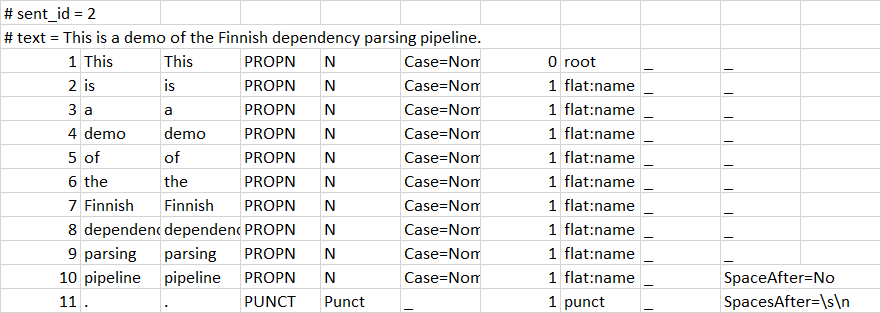

## Processing Conllu-format
* Cut command targeting specific columns is useful for Conllu

`cat file.conllu | cut -f 2` # focuses on the second column (WORD)
 
`cat file.conllu | cut -f 3` # focuses on the third column (LEMMA)

* Conllu-format also allows to easily count sentences by counting just the number of lines starting with 1

`cat file.conllu | egrep "^1[[:space:]]"` # the space is needed to not to match 10


Let's try with the UD English Web Treebank! First basic stats:
* Number of documents, words, sentences?
* Most frequent words? And lemmas - now we can do that?

In [ ]:
! git clone https://github.com/UniversalDependencies/UD_English-EWT.git

In [ ]:
%cd UD_English-EWT/
! ls

In [ ]:
! cat *conllu | head -20 # lots of metadata! 
# how do new documents seem to start?

In [ ]:
# let's count how many words
! cat *conllu | egrep "^[0-9]" | head # this looks ok

In [ ]:
! cat *conllu | egrep "^[0-9]" | wc -l

In [ ]:
# and then how many documents?

! cat *conllu | egrep "^# newdoc" | head

In [ ]:
! cat *conllu | egrep "^# newdoc" | wc -l

In [ ]:
# counting the most frequent words
! cat *conllu | egrep "^[0-9][[:space:]]"  | head # focus on running words

In [ ]:
! cat *conllu | egrep "^[0-9][[:space:]]" | cut -f 2 | sort | uniq -c | sort -rn | head

In [ ]:
# the most frequent words seem to be similar as usual, but hey now we can do other things as well, like
# counting the most frequent lemmas, or adjectives, etc! 

## Parsing with Trankit

Let's try to produce conllu data by using a parser! 
This time, we'll go with Trankit, available at https://trankit.readthedocs.io/

In [ ]:
! pip install trankit

In [ ]:
! git clone https://github.com/nlp-uoregon/trankit
%cd trankit
! pip install -e .

In [ ]:
! pip install trankit==1.1.0
! pip install transformers

In [ ]:
from trankit import Pipeline
from trankit import trankit2conllu

p = Pipeline('english') # other languages possible as well!

In [ ]:
# a non-empty string to process, which can be a document or a paragraph with multiple sentences
doc_text = '''Hello! This is Trankit.'''

# perform all tasks on the input
all = p(doc_text)
all_conllu = trankit2conllu(all)
print(all_conllu)

I put yet a script to the course scripts folder that can parse from standard input. Let's try it!

In [ ]:
! git clone https://github.com/TurkuNLP/ATP_kurssi.git

In [ ]:
! echo "This is trankit!" | python3 ATP_kurssi/scripts/parse.py